<a href="https://colab.research.google.com/github/Arya-adesh/Arya-adesh/blob/main/color_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

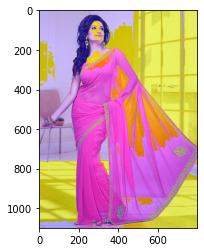

In [ ]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('/content/elegant-pink-satin-chiffon-saree-sakvf7039-u.webp')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# create a copy of the original image
img_rgb = img.copy()

# extract blue channel of the rgb image
b = img_rgb[:,:,2] 

# increase the pixel values by 100
b = b + 100    

# if pixel values become > 255, subtract 255 
cond = b[:, :] > 255
b[cond] = b[cond] - 255 

# assign the modified channel to image
img_rgb[:,:,2] = b 

plt.imshow(img_rgb)

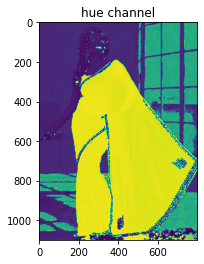

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  from ipykernel import kernelapp as app


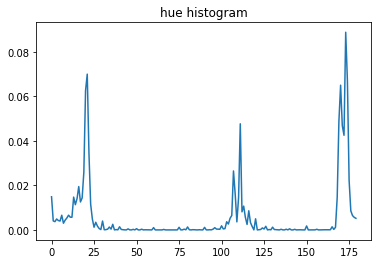

In [ ]:
import numpy as np

# Convert Image into HSV space
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# extract hue channel from the image
hue = img_hsv[:,:,0]

# plotting hue channel
plt.title('hue channel')
plt.imshow(hue)
plt.show()

# calculate a histogram with 180 bins, one for each color
hist, _ = np.histogram(hue, bins=180, normed=True)
plt.title("hue histogram")
plt.plot(hist)
plt.show()

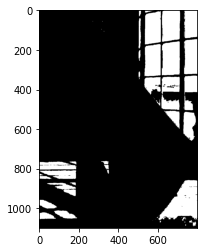

In [ ]:
h = 115 # hue value
t = 20 # tolerance value

# create a binary mask for pen color
min_hue = np.array([h - t])
max_hue = np.array([h + t])

mask_hue = cv2.inRange(hue, min_hue, max_hue)

# visualise the mask
plt.imshow(mask_hue, cmap='gray')

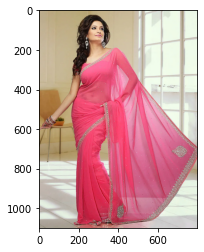

In [ ]:
 #modfiy hue values satisfying the condition
hue[mask_hue > 0] = hue[mask_hue > 0] + 120

# assign the modified hue channel back to the hsv image
img_hsv[:,:,0] = hue

im = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(im)